In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, roc_auc_score
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier

from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

In [ ]:
train = pd.read_csv("/content/drive/MyDrive/ES_Twitch_Dataset/Train_Final.csv")
test = pd.read_csv("/content/drive/MyDrive/ES_Twitch_Dataset/Test_Final.csv")

In [ ]:
x_train = train.drop({'Target', 'Unnamed: 0'}, axis = 1)
y_train = train['Target']

In [ ]:
x_test = test.drop({'Target', 'Unnamed: 0'}, axis = 1)
y_test = test['Target']

In [ ]:
# knn = KNeighborsClassifier()

# params = { "n_neighbors": [5, 10, 15],
#            "algorithm": ['kd_tree', 'ball_tree'],
#            "weights": ['uniform', 'distance'],
#          }

# model = RandomizedSearchCV(knn, params, random_state=123, n_jobs = 1, n_iter = 5, cv = 2, scoring="roc_auc")
best_params = {'algorithm': 'kd_tree', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 15, 'p': 2, 'weights': 'uniform'}
model = KNeighborsClassifier(algorithm='kd_tree', leaf_size= 30, metric= 'minkowski', metric_params= None, n_jobs= None, n_neighbors= 15, p= 2, weights='uniform')

## Entreno el modelo

In [ ]:
model.fit(x_train, y_train)

KNeighborsClassifier(algorithm='kd_tree', n_neighbors=15)

Mejores hiperparametros encontrados

In [ ]:
# best_params = model.best_estimator_.get_params()
# best_params

## Scores

Calculo el score para el set de entrenamiento

In [ ]:
roc_auc_score(y_train, model.predict_proba(x_train)[:,1])

0.9407597999400508

Calculo el score para el set de test:

In [ ]:
roc_auc_score(y_test, model.predict_proba(x_test)[:,1])

0.8861750881136922

## Matriz de Confusión

Text(0.5, 1.0, 'Confusion matrix')

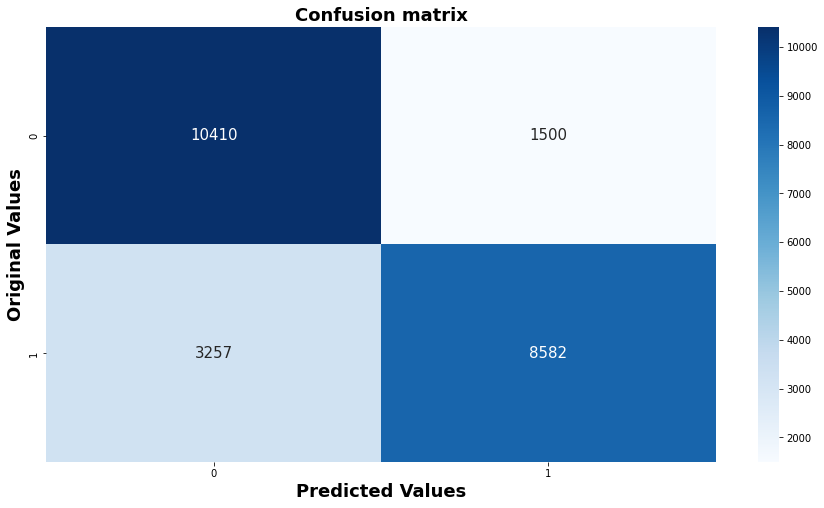

In [ ]:
C = confusion_matrix(y_test, model.predict(x_test))  
plt.figure(figsize=(15,8))
labels = [0,1]
sns.heatmap(C, annot=True, cmap="Blues", fmt="d", xticklabels=labels, yticklabels=labels, annot_kws={'size': 15})
plt.xlabel('Predicted Values', fontsize=18, fontweight='bold')
plt.ylabel('Original Values', fontsize=18, fontweight='bold')
plt.title("Confusion matrix", fontsize = 18, fontweight='bold')